# CSE437: Data Science

## Project

## Flood Prediction using Machine Learning

### Libraries

In [ ]:
# Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
from sklearn.preprocessing import StandardScaler

# Model Training
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

### Data Exploration

In [ ]:
df = pd.read_csv("/content/Dataset - Flood Prediction.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.shape

(50000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

### Data Preprocessing

In [ ]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
df.duplicated().value_counts()

,count
False,50000


Correlation Matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,0.002358,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,0.001328,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,0.006269,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,0.002312,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,0.001289,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,-0.005455,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,-0.001116,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,0.000667,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,0.003387,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,0.001461,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259




```
# This is formatted as code
```

Correlation Heatmap

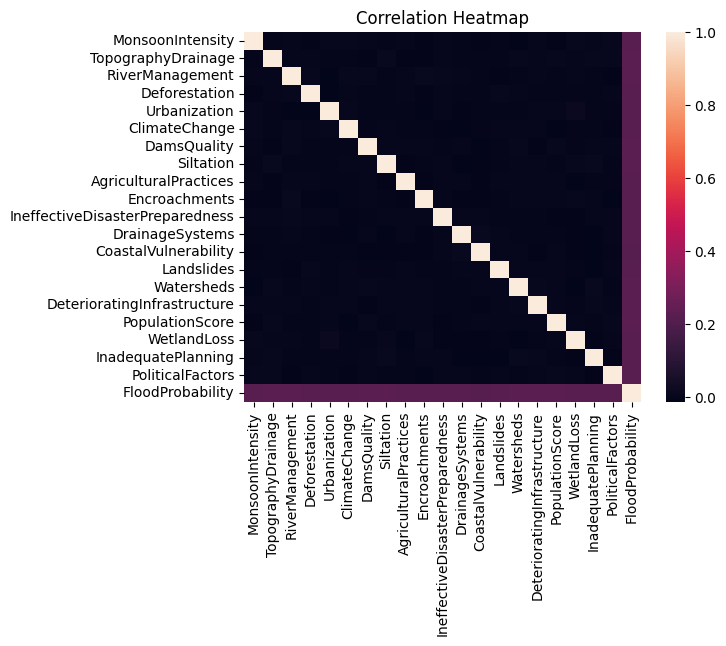

In [ ]:
sns.heatmap(corr_matrix, annot = False)
plt.title("Correlation Heatmap", fontsize = 12)
plt.show()

Correlation Coefficients

In [ ]:
corr_w_target = corr_matrix["FloodProbability"].drop("FloodProbability")
corr_w_target

,FloodProbability
MonsoonIntensity,0.224081
TopographyDrainage,0.229414
RiverManagement,0.228917
Deforestation,0.220237
Urbanization,0.220867
ClimateChange,0.220986
DamsQuality,0.227467
Siltation,0.226544
AgriculturalPractices,0.221846
Encroachments,0.218259


Correlation Coefficient Visualization

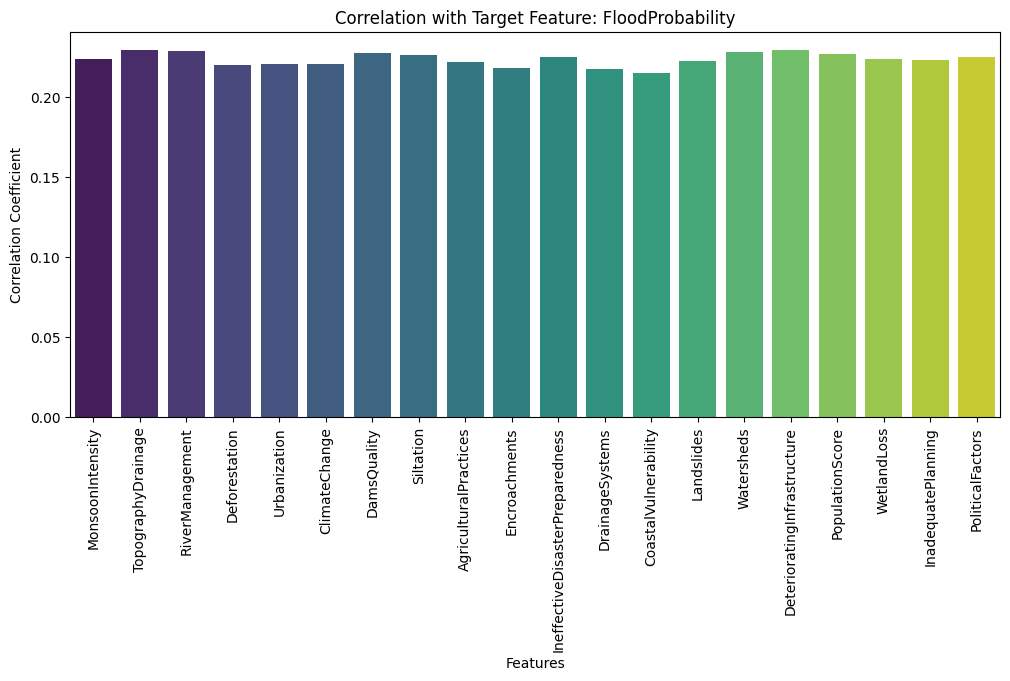

In [ ]:
corr_w_target = corr_w_target.squeeze()

plt.figure(figsize = (12, 5))
sns.barplot(x = corr_w_target.index, y = corr_w_target.values, hue = corr_w_target.index, palette = "viridis")
plt.xticks(rotation = 90)
plt.title('Correlation with Target Feature: FloodProbability')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

In [ ]:
x = df["FloodProbability"]

y = df.drop(["FloodProbability"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(y, x, test_size = 0.2, random_state = 1)

print(f"Training Set: x: {X_train.shape}, y: {y_train.shape}")
print(f"Testing Set: x: {X_test.shape}, y: {y_test.shape}")

Training Set: x: (40000, 20), y: (40000,)
Testing Set: x: (10000, 20), y: (10000,)


#### Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Per-feature minimum before scaling:\n {}\n".format(X_train.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

Per-feature minimum before scaling:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

Per-feature maximum before scaling:
 MonsoonIntensity                   16
TopographyDrainage                 18
RiverManagement                    16
Deforestation                      17
Urbanization        

In [ ]:
print("Per-feature minimum after scaling:\n {}\n".format(X_train_scaled.min(axis=0)))
print("Per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

Per-feature minimum after scaling:
 [-2.23728446 -2.21563365 -2.25584188 -2.24839863 -2.21757448 -2.23294808
 -2.23127401 -2.23647734 -2.24133971 -2.23459889 -2.24740166 -2.23448182
 -2.23318126 -2.23675134 -2.23382097 -2.23094595 -2.23199105 -2.24821749
 -2.2399782  -2.21877161]

Per-feature maximum after scaling:
 [4.93292452 5.78139979 4.94865927 5.39119098 5.35200289 5.38226371
 4.88191496 4.94780186 4.93320734 5.81176755 4.92760176 5.36564442
 5.34936068 4.94393887 4.94653824 5.38901732 4.9172078  7.63351423
 4.93523489 4.89399383]


### Model Training and Testing

SVR

In [ ]:
model = svm.SVR()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.02069348359942484
Root Mean Square Error: 0.027144265631462057
R-squared Score: 0.7097965872493321


Decision Tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.0371695
Root Mean Square Error: 0.04689000426530158
R-squared Score: 0.13402198481418048


Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.02046819500000001
Root Mean Square Error: 0.026094783851375366
R-squared Score: 0.7318031147291265


KNN

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mean_abs_err = mean_absolute_error(y_test, y_pred)
rms_err = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("R-squared Score:", r2)

Mean Absolute Error: 0.018602800000000003
Root Mean Square Error: 0.02380209234500194
R-squared Score: 0.7768604290397192


### Probability Prediction Visualization

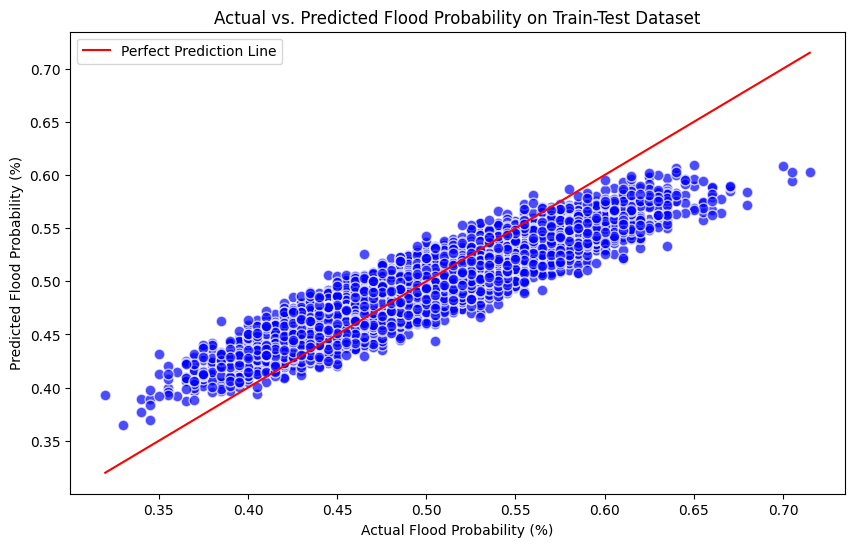

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color = "blue", alpha = 0.7, edgecolors = "w", s = 60)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", label = "Perfect Prediction Line")
plt.xlabel("Actual Flood Probability (%)")
plt.ylabel("Predicted Flood Probability (%)")
plt.title("Actual vs. Predicted Flood Probability on Train-Test Dataset")
plt.legend()
plt.show()

### Model Performance Evaluation Summary

SVM
Mean Absolute Error: 0.0207
Root Mean Sqaure Error: 0.0272
R-squared Score: 0.7090

--------------------------------------------------

Decision Tree
Mean Absolute Error: 0.0372
Root Mean Sqaure Error: 0.0469
R-squared Score: 0.1346

--------------------------------------------------

Random Forest
Mean Absolute Error: 0.0205
Root Mean Sqaure Error: 0.0261
R-squared Score: 0.7315

--------------------------------------------------

KNN
Mean Absolute Error: 0.0186
Root Mean Sqaure Error: 0.0238
R-squared Score: 0.7776

--------------------------------------------------



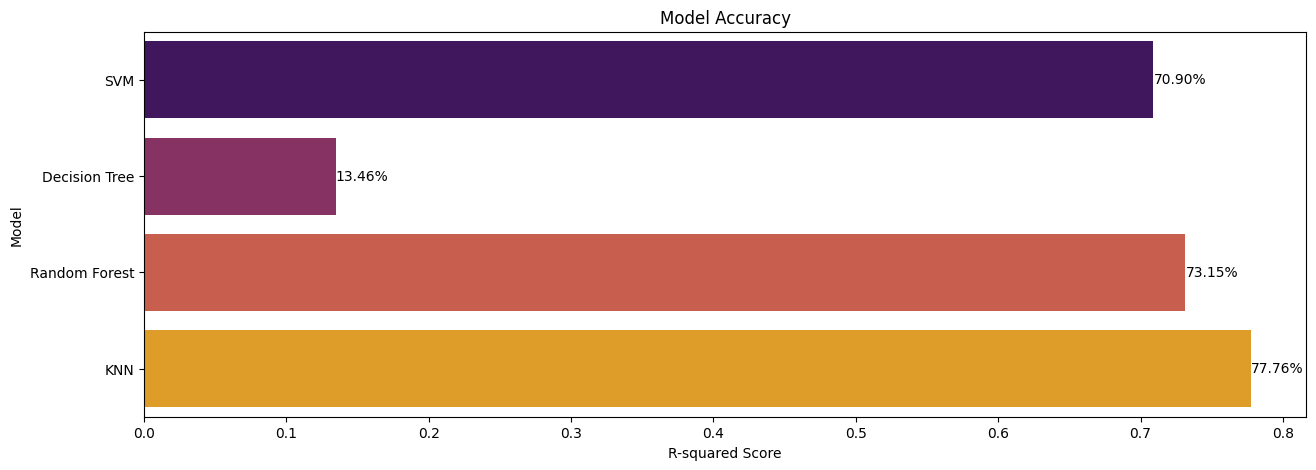

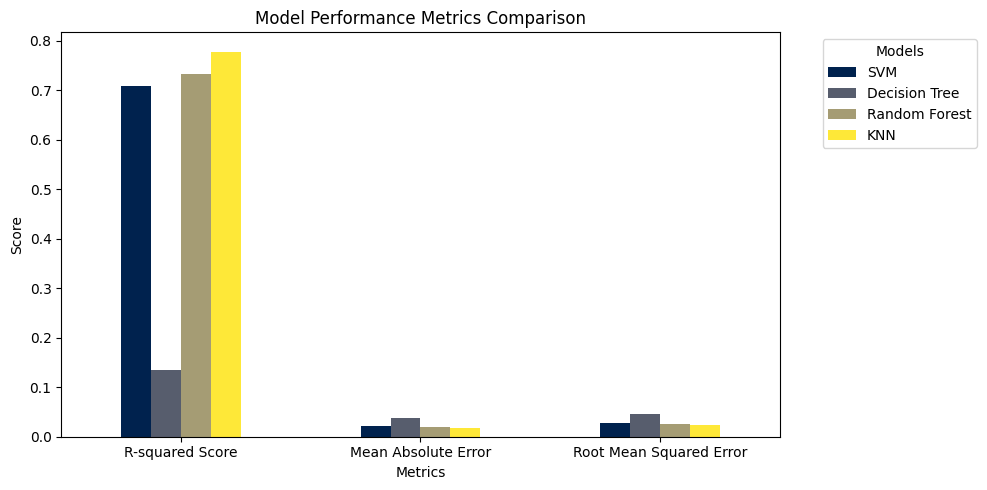

In [ ]:
models = {
    'SVR' : svm.SVR(max_iter = 1000),
    'Decision Tree' : DecisionTreeRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42, n_estimators = 100),
    'KNN' : KNeighborsRegressor(n_neighbors = 5),
}

mean_abs_errs = {}
rms_errs = {}
r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test, y_pred)
    mean_abs_errs[name] = mean_abs_err

    rms_err = root_mean_squared_error(y_test, y_pred)
    rms_errs[name] = rms_err

    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

    print(name, end = "\n")
    print(f"Mean Absolute Error: {mean_abs_err:.4f}")
    print(f"Root Mean Sqaure Error: {rms_err:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    print("\n" + "-" * 50 + "\n")

plt.figure(figsize=(15, 5))
sns.barplot(x = list(r2_scores.values()), y = list(r2_scores.keys()), hue = list(r2_scores.keys()), palette = "inferno", dodge = False)
plt.ylabel('Model')
plt.xlabel('R-squared Score')
plt.title('Model Accuracy')
plt.legend([],[], frameon = False)

for i, v in enumerate(r2_scores.values()):
    plt.text(v, i, f"{v*100:.2f}%", color = "black", va = "center")

plt.show()

print()

metrics_df = pd.DataFrame({
    "R-squared Score": r2_scores,
    "Mean Absolute Error": mean_abs_errs,
    "Root Mean Squared Error": rms_errs
})

metrics_df.T.plot(kind = "bar", figsize=(10, 5), colormap = "cividis")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation = 0)
plt.legend(title = "Models", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()